In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (7,8)
plt.rcParams['axes.labelsize'] = 38

Let's do a plot k x gamma/u or k x u/gamma (relative field:external energies) with field.

decide on: alpha = -5, c = .5, n=6, kappa=H0=0.

At each k from .2 to 1.2, I need field energies for all a, but only alpha=-5, c=.6 simultaions.

In [2]:
ks = range(2,13,1)
alpha=-5
c=0.5

In [3]:
paths= dict([])
for k in ks:
    paths_k = dict([(a,"/home/jsk/cylinder/fixed_surfaces/k"+str(k)+"a"+str(a)) for a in range(10)])
    paths[k] = paths_k

In [4]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data

In [5]:
field_energies=dict([])
for k in ks:
    field_energies_k = dict([(a,sort_csv(os.path.join(paths[k][a], "field_energy.csv"), dtype=complex)) for a in paths[k]])
    field_energies[k]= field_energies_k
#dict to dataframe


In [6]:
field_energies[6][6].loc[c,alpha]

295.949021378129

I then combine with surface tension to get energy minimizing a.

Retrieve surface area values (all energies are /2pi)

In [18]:
surfdatatens=pd.read_csv("chapter2data/surfenergytens.csv", index_col=0, dtype=float)
surfdatatens

,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2
0.0,31.415927,20.943951,15.707963,12.566371,10.471976,8.975979,7.853982,6.981317,6.283185,5.711987,5.235988
0.1,31.340798,20.896463,15.675075,12.542864,10.455242,8.964527,7.846878,6.977940,6.283098,5.714871,5.241606
0.2,31.118597,20.755887,15.577570,12.473002,10.405300,8.930086,7.825168,6.967105,6.281832,5.722216,5.256835
0.3,30.758515,20.527687,15.418832,12.358730,10.322969,8.872507,7.787817,6.946938,6.276688,5.730493,5.277303
0.4,30.274725,20.220337,15.204171,12.203193,10.209704,8.791816,7.733573,6.914987,6.264059,5.734965,5.297151
0.5,29.684931,19.844510,14.940386,12.010563,10.067667,8.688504,7.661452,6.868928,6.240368,5.730861,5.310462
0.6,29.008736,19.412145,14.635234,11.785805,9.899717,8.563716,7.571137,6.807146,6.202826,5.714318,5.312379
0.7,28.266115,18.935550,14.296890,11.534372,9.709301,8.419308,7.463161,6.729042,6.149849,5.682881,5.299679
0.8,27.476153,18.426637,13.933444,11.261889,9.500265,8.257752,7.338890,6.635069,6.081123,5.635594,5.270860
0.9,26.656162,17.896361,13.552515,10.973856,9.276619,8.081942,7.200349,6.526564,5.997432,5.572792,5.225903


In [17]:
curvdatatens=pd.read_csv("chapter2data/curvenergytens.csv", index_col=0, dtype=float)
curvdatatens

,0.005,0.015,0.025,0.035,0.045,0.055,0.065,0.075,0.085,0.095,...,1.305,1.315,1.325,1.335,1.345,1.355,1.365,1.375,1.385,1.395
-0.99,54.369246,54.368804,54.367920,54.366597,54.364834,54.362635,54.360003,54.356939,54.353450,54.349538,...,54.809848,54.860993,54.913517,54.967432,55.022751,55.079487,55.137651,55.197257,55.258316,55.320841
-0.98,38.414209,38.413795,38.412969,38.411730,38.410081,38.408024,38.405562,38.402697,38.399434,38.395777,...,39.033917,39.087269,39.142005,39.198139,39.255683,39.314649,39.375050,39.436897,39.500204,39.564982
-0.97,31.340836,31.340444,31.339661,31.338486,31.336923,31.334974,31.332640,31.329925,31.326833,31.323368,...,32.083382,32.138113,32.194230,32.251745,32.310671,32.371020,32.432804,32.496035,32.560726,32.626888
-0.96,27.121673,27.121298,27.120550,27.119430,27.117938,27.116078,27.113851,27.111261,27.108311,27.105006,...,27.958503,28.014200,28.071281,28.129759,28.189646,28.250954,28.313695,28.377881,28.443525,28.510638
-0.95,24.240852,24.240493,24.239776,24.238703,24.237273,24.235491,24.233357,24.230875,24.228050,24.224883,...,25.153982,25.210386,25.268172,25.327352,25.387936,25.449939,25.513371,25.578246,25.644574,25.712368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,24.240852,24.240493,24.239776,24.238703,24.237273,24.235491,24.233357,24.230875,24.228050,24.224883,...,25.153982,25.210386,25.268172,25.327352,25.387936,25.449939,25.513371,25.578246,25.644574,25.712368
0.96,27.121673,27.121298,27.120550,27.119430,27.117938,27.116078,27.113851,27.111261,27.108311,27.105006,...,27.958503,28.014200,28.071281,28.129759,28.189646,28.250954,28.313695,28.377881,28.443525,28.510638
0.97,31.340836,31.340444,31.339661,31.338486,31.336923,31.334974,31.332640,31.329925,31.326833,31.323368,...,32.083382,32.138113,32.194230,32.251745,32.310671,32.371020,32.432804,32.496035,32.560726,32.626888
0.98,38.414209,38.413795,38.412969,38.411730,38.410081,38.408024,38.405562,38.402697,38.399434,38.395777,...,39.033917,39.087269,39.142005,39.198139,39.255683,39.314649,39.375050,39.436897,39.500204,39.564982


In [38]:
surfdatatens.loc[:,'0.2']

0.0    31.415927
0.1    31.340798
0.2    31.118597
0.3    30.758515
0.4    30.274725
0.5    29.684931
0.6    29.008736
0.7    28.266115
0.8    27.476153
0.9    26.656162
Name: 0.2, dtype: float64

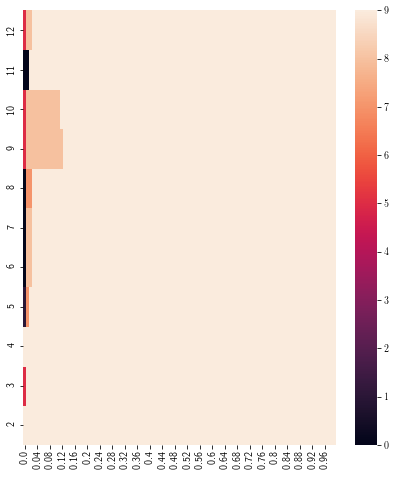

In [48]:
minimum_as = dict([])
minimum_Es = dict([])
gammas=np.arange(0,1,.01)
kappa=0
for gamma in gammas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]+
                     kappa*math.pi*curvdatatens.loc[a/10,str(round(k/10+.005,5))]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy
    minimum_as[gamma]=minimum_as_row
    minimum_Es[gamma] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as)
plt.gca().invert_yaxis()

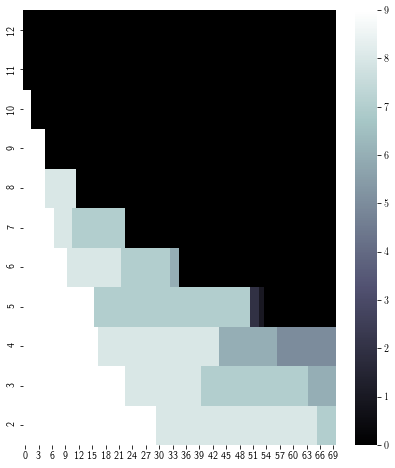

In [52]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=100
kappas=np.arange(0,70, 1)
alpha=-4
c=0.5
for kappa in kappas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]
                     +kappa*math.pi*curvdatatens.loc[a/10,str(round(k/10+.005,5))]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy
    minimum_as[kappa]=minimum_as_row
    minimum_Es[kappa] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as, cmap='bone', vmin=0, vmax=9)
plt.gca().invert_yaxis()

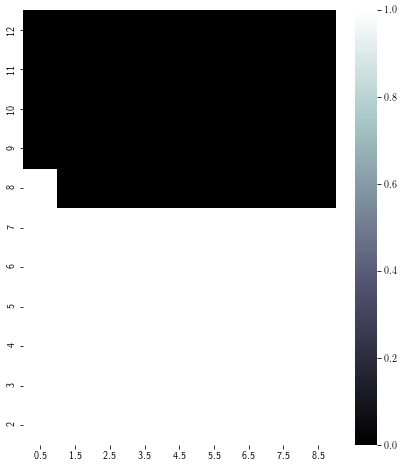

In [53]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=100
kappa=10
alpha=-3
cs=np.arange(.5,9.5, 1)
for c in cs:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]
                     +kappa*math.pi*curvdatatens.loc[a/10,str(round(k/10+.005,5))]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy
    minimum_as[c]=minimum_as_row
    minimum_Es[c] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as, cmap='bone',vmin=0, vmax=1)
plt.gca().invert_yaxis()

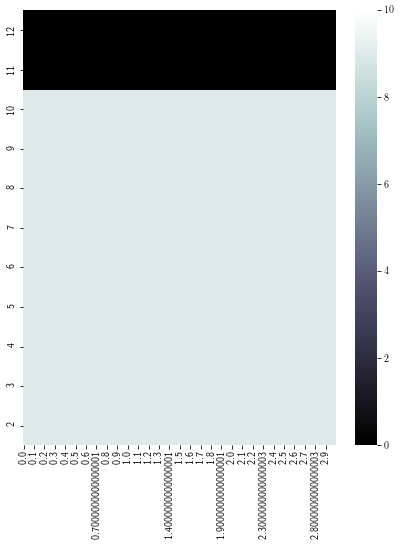

In [54]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=100
kappa=0
exts=np.arange(0, 3, .01)
for ext in exts:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in ks:
        energies = [(field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]
                     +kappa*math.pi*curvdatatens.loc[a/10,str(round(k/10+.005,5))]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy
    minimum_as[ext]=minimum_as_row
    minimum_Es[ext] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
sb.heatmap(minimum_as, vmax=10, vmin=0, cmap='bone')
plt.gca().invert_yaxis()

alpha=-5, c=.5: We see that field strength >1/100th gamma stabilizes, field strengt <1/600th gamma has no effect.  

Tried other things: with alpha=-1, c=.5 field has no effect from gamma=100.  At alpha=-5, c=8.5, the upper limit is similar form as before, but field also stabilizes on smaller k (longer objects).  These are of the type that only go between N=0 and no field.  This regime seems to start at c=3.5, though more adjustments are possible on longer (smaller k) cylinders.

smaller k - more extreme surface area difference - would think surface tension part more likely to win.  But unexpectedly differences in field energy are also more extreme on longer cylinders, where choosing between N=0 and isotropic.  At high c, field can't adjust profile either.

At high c, high alpha (5.5, -5) cylinder is stabilized almost everywhere - maybe the two regions hae joined

Now using alpha=-3, c=5.5 to see interesting effect

Only amplitudes 0 or .9 are seen so far.

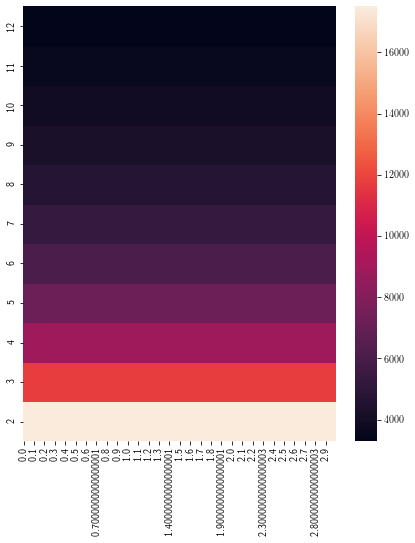

In [55]:
sb.heatmap(minimum_Es)
plt.gca().invert_yaxis()

Additionally look at all the minimum configurations and label them - in this case just the a=.9 s from different ksets.

In [56]:
def kcrit_old(gamma, kappa, alpha, c, n, u=1):
    #g is gamma/kappa ratio
    g=gamma/kappa
    # then c is similarly c/kappa ,  i.e. kappa set to 1
    discriminant1 =-23 + 12 * g +4 * g**2
    if alpha<0:
        discriminant1 -=32*(abs(alpha)*c*n**2/(2*u))/gamma #c is in units of gamma
        #alpha, u are techincally also in units gamma but their scaling cancels
    #(else if alpha>=0 add 0 for field)
    #print(discriminant1)
    if discriminant1<0:
        return None
    else:
        discriminant2 = 1-2*g+  math.sqrt(discriminant1)
        #print(discriminant2)
        if discriminant2 <0:
            return None
        else:
            return .5*math.sqrt(discriminant2)

In [61]:
def kcrit(g,h):
    g+=2*h**2
    #discriminant1_alt =-23 -16*h+ 12* g+64*h**2+ + 32 * g*h+4 * g**2
    discriminant1 =8*(2*g-3)+(-1+8*h+2*g)**2
    #print(discriminant1,discriminant1_alt )
    if discriminant1<0:
        return np.nan
    else:
        discriminant2 = 1-2*g-8*h + math.sqrt(discriminant1)
        #print(discriminant2, math.sqrt(discriminant1), 1-8*h + math.sqrt(discriminant1), 2*g)
        if discriminant2 <0:
            return np.nan
        else:
            return .5*math.sqrt(discriminant2)

In [62]:
print(kcrit(1000000, -1, .015, 6, 1))

TypeError: kcrit() takes 2 positional arguments but 5 were given

TypeError: kcrit() got an unexpected keyword argument 'alpha'

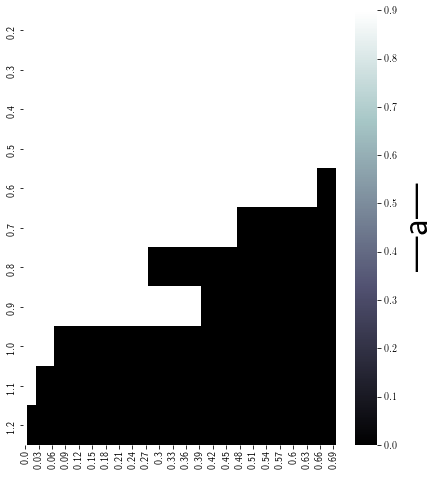

In [63]:
gs = list(np.arange(1, 100, .01))
gs.extend([100,500,1000,10000,100000])

minimum_as = dict([])
minimum_Es = dict([])
gamma=1
kappas=np.arange(0,.7, .01)
alpha=1
c=1.5
for kappa in kappas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in range(2,6):
        minimum_as_row[k]= np.nan
    for k in ks:
        energies = [(field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]
                     +kappa*math.pi*curvdatatens.loc[a/10,str(round(k/10+.005,5))]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a
        minimum_Es_row[k] = energy
    minimum_as[kappa]=minimum_as_row
    minimum_Es[kappa] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
minimum_as.index=[x/10 for x in minimum_as.index]
minimum_as.columns=[round(x,5) for x in minimum_as.columns]
sb.heatmap(minimum_as, cmap='bone', vmin=0, vmax=.9,cbar_kws={'label': '|a|'})

kcrits_ = [kcrit(gamma/kappa, alpha=.01*alpha, c=c, n=6) for kappa in kappas if kappa!=0]
plt.plot([kappa*len(minimum_as.columns)/.7 for kappa,kc in zip(kappas, kcrits_) if kc is not None], 
         [(kc-.25)*len(minimum_as.index)/1.0 for kc in kcrits_ if kc is not None], color='red')
kcrits_0 = [kcrit(gamma/kappa, alpha=0, c=0, n=0) for kappa in kappas if kappa !=0]
#plt.plot([1/g*len(minimum_as.columns)/.7 for g,kc in zip(gs, kcrits_0) if kc is not None], 
#         [(kc-.25)*len(minimum_as.index)/1.0 for kc in kcrits_0 if kc is not None], color='red', linestyle=":")

plt.gca().invert_yaxis()
#plt.ylabel('k_c')
#plt.xlabel('kappa/gamma')
#plt.savefig("k_kappa_mapline_n6_alpha1_c1p5.png")

In [14]:
#alpha=-4
kcrits_ = [kcrit(g, alpha=.01*alpha, c=c, n=6) for g in gs]
plt.plot([1/g for g,kc in zip(gs, kcrits_) if kc is not None], [kc for kc in kcrits_ if kc is not None])
plt.xlim((0,.7))
#plt.savefig("k_kappa_line_n6_alpham-4_c1p5.png")

TypeError: kcrit() missing 1 required positional argument: 'kappa'

In [ ]:
plt.plot([kappa for kappa,kc in zip(kappas, kcrits_) if kc is not None], 
         [kc for kc in kcrits_ if kc is not None], color='red')
plt.plot([kappa for kappa,kc in zip(kappas, kcrits_0) if kc is not None], 
         [kc for kc in kcrits_0 if kc is not None], color='red')
plt.ylim((.15, 1.25))
plt.xlim((-0.005, .705))

In [ ]:
minimum_as = dict([])
minimum_Es = dict([])
gamma=1
kappas=np.arange(0,.7, .01)
kappas[0]+=.000001
alpha=1
c=1.5
field_factor=0.0
for kappa in kappas:
    minimum_as_row = dict([])
    minimum_Es_row = dict([])
    for k in range(2,6):
        minimum_as_row[k]= np.nan
    for k in ks:
        energies = [(field_factor*field_energies[k][a].loc[c, alpha]+gamma*2*math.pi*surfdatatens.loc[a/10,str(k/10)]+kappa*math.pi*curvdatatens.loc[a/10,str(k/10)]
                     ,a) for a in paths[k]]
        energy, a = min(energies)
        minimum_as_row[k]= a/10
        minimum_Es_row[k] = energy*(k/10)
    minimum_as[kappa]=minimum_as_row
    minimum_Es[kappa] = minimum_Es_row
minimum_as = pd.DataFrame(minimum_as)
minimum_Es = pd.DataFrame(minimum_Es)
minimum_as.index=[x/10 for x in minimum_as.index]
minimum_as.columns=[round(x,5) for x in minimum_as.columns]
sb.heatmap(minimum_as, cmap='bone', vmin=0, vmax=.9, cbar_kws={'label': r'shape amplitude $a$'},
          xticklabels=10)
kcrits_ = [kcrit(gamma,kappa, alpha=field_factor*alpha, c=field_factor*c, n=6, u=field_factor*1) for kappa in kappas if kappa!=0]
plt.plot([(kappa*len(minimum_as.columns)+.005)/.705 for kappa,kc in zip(kappas, kcrits_) if kc is not None], 
         [(kc-.2+.05)*(len(minimum_as.index))/1.1 for kc in kcrits_ if kc is not None], color='red')
kcrits_0 = [kcrit(gamma,kappa, alpha=0, c=0, n=0) for kappa in kappas if kappa !=0]
plt.plot([(kappa*len(minimum_as.columns)+.005)/.705 for kappa,kc in zip(kappas, kcrits_0) if kc is not None], 
         [(kc-.2+.05)*(len(minimum_as.index))/1.1 for kc in kcrits_0 if kc is not None], color='red', linestyle=":")

plt.gca().invert_yaxis()
plt.ylabel(r'wavenumber $k$')
plt.xlabel(r'bending rigidity $\kappa/\gamma$')
plt.savefig("k_kappa_mapline_nofield.png",bbox_inches = 'tight')

In [ ]:
paths[6]

In [19]:
stability_field_m4=pd.read_csv("pinch_off_stability_field_m4.csv", index_col=1)